In [4]:
# 1. import libs

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
# 2. 🧾 Sample business dataset (sales before and after a campaign)
data = {
    'Store_ID': np.arange(1, 11),
    'Sales_Before': [2000, 2200, 2500, 2100, 2700, 2900, 3100, 2300, 2400, 2600],
    'Sales_After': [2500, 2600, 2800, 2600, 3000, 3300, 3500, 2700, 2900, 3100]
}

# creating a data frame
df = pd.DataFrame(data)

# 📊 Statistical Summary
print("📌 Statistical Summary:\n")
print(df.describe())


📌 Statistical Summary:

       Store_ID  Sales_Before  Sales_After
count  10.00000     10.000000    10.000000
mean    5.50000   2480.000000  2900.000000
std     3.02765    352.136337   326.598632
min     1.00000   2000.000000  2500.000000
25%     3.25000   2225.000000  2625.000000
50%     5.50000   2450.000000  2850.000000
75%     7.75000   2675.000000  3075.000000
max    10.00000   3100.000000  3500.000000


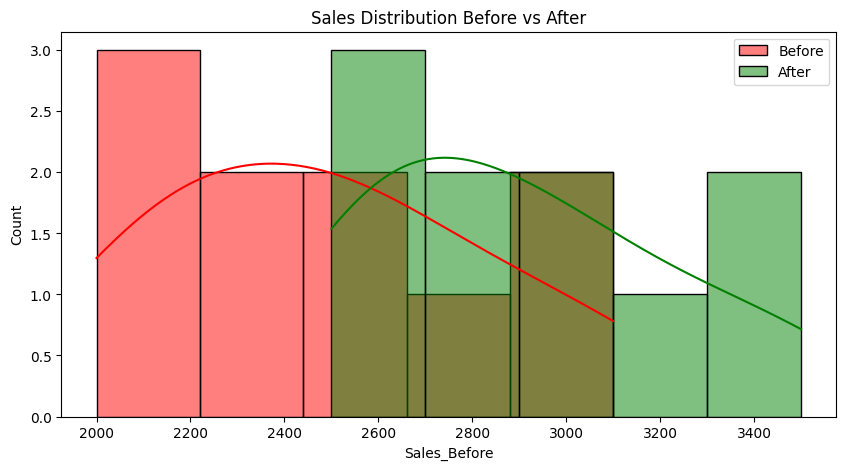

In [6]:
# 📈 Visualization (Optional)
plt.figure(figsize=(10, 5))
sns.histplot(df['Sales_Before'], kde=True, color='red', label='Before')
sns.histplot(df['Sales_After'], kde=True, color='green', label='After')
plt.title('Sales Distribution Before vs After')
plt.legend()
plt.show()


In [7]:
# 🧪 Hypothesis Test: Paired T-Test
t_stat, p_value = stats.ttest_rel(df['Sales_Before'], df['Sales_After'])

# 🧾 Result Interpretation
print("\n📌 Paired T-Test Result:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Result: Statistically significant difference in sales (reject H0)")
else:
    print("❌ Result: No significant difference (fail to reject H0)")


📌 Paired T-Test Result:
T-Statistic: -16.8375
P-Value: 0.0000
✅ Result: Statistically significant difference in sales (reject H0)


In [ ]:
#  1. Load the Dataset


In [8]:
# init ur google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
UTF-8 decoding failed, trying 'latin-1'
📌 Statistical Summary:
          count       mean         std        min     25%      50%        75%  \
Region                                                                          
Central  2323.0  17.092709  291.487465 -3701.8928 -5.6643   5.1840  22.456200   
East     2848.0  32.135808  251.605084 -6599.9780  1.5579   8.1717  28.718550   
South    1620.0  28.857673  212.893088 -3839.9904  1.9471   9.0720  34.233925   
West     3203.0  33.849032  174.109081 -3399.9800  3.8520  11.1664  33.000400   

               max  
Region              
Central  8399.9760  
East     5039.9856  
South    3177.4750  
West     6719.9808  

📌 Hypothesis Test: Profit Difference between East and West
T-Statistic: -0.3043
P-Value: 0.7609
❌ No significant difference (Fail to reject H0)


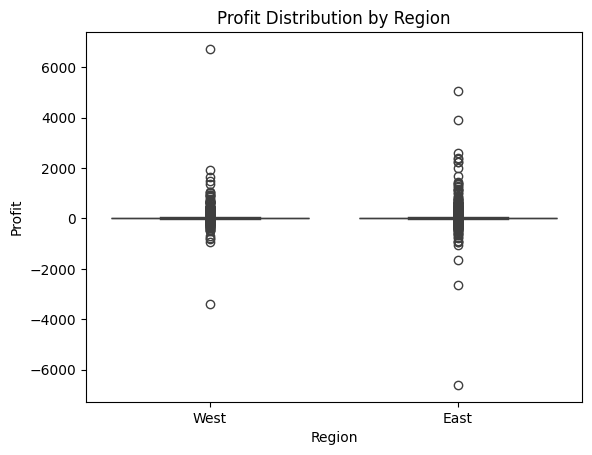

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive # Make sure google.colab is imported if using Colab

drive.mount("/content/drive") # Mount Google Drive if using Colab

# Load dataset (replace with your actual file path)
# Specify the encoding to handle potential non-UTF-8 characters
try:
    df = pd.read_csv('/content/drive/MyDrive/Data/Superstore.csv', encoding='utf-8')
except UnicodeDecodeError:
    print("UTF-8 decoding failed, trying 'latin-1'")
    df = pd.read_csv('/content/drive/MyDrive/Data/Superstore.csv', encoding='latin-1')


# Clean data: Remove missing profits or regions
df = df[['Region', 'Profit']].dropna()

# Filter two regions for comparison
region1 = 'East'
region2 = 'West'

profit_region1 = df[df['Region'] == region1]['Profit']
profit_region2 = df[df['Region'] == region2]['Profit']

# 📊 Statistical Summary
print("📌 Statistical Summary:")
print(df.groupby('Region')['Profit'].describe())

# 🧪 Hypothesis Test: Are average profits different between Region 1 and Region 2?
t_stat, p_value = ttest_ind(profit_region1, profit_region2, equal_var=False)

print("\n📌 Hypothesis Test: Profit Difference between East and West")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Significant difference in average profits (Reject H0)")
else:
    print("❌ No significant difference (Fail to reject H0)")

# 📈 Optional: Visualize with Boxplot
sns.boxplot(x='Region', y='Profit', data=df[df['Region'].isin([region1, region2])])
plt.title('Profit Distribution by Region')
plt.show()


Interpretation:

Statistical summary tells you mean, std, quartiles.

T-test checks if average profits differ significantly.

p-value < 0.05 → significant difference.

Boxplot helps visualize profit spread and outliers.


# New section


```
# This is formatted as code

groupby().describe()	Statistical summary of profit per region

ttest_ind()	T-test to compare mean profit of two regions

p_value < 0.05	Means the difference is statistically significant

boxplot	Visualizes profit distribution and outliers


```



In [ ]:
#ANOVA

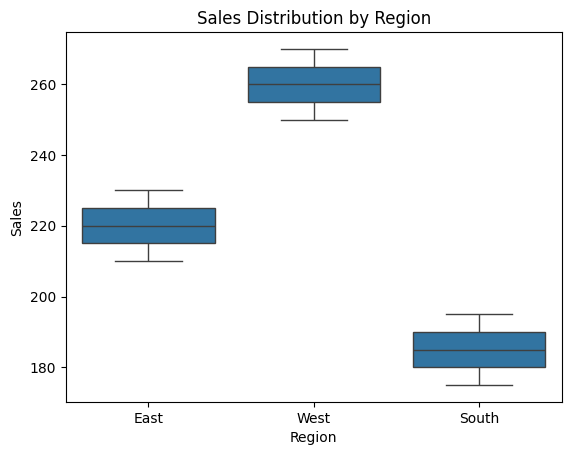

📌 One-Way ANOVA Test Results
F-Statistic: 112.6667
P-Value: 0.0000
✅ At least one group mean is significantly different (Reject H0)


In [ ]:
import pandas as pd
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data simulating total sales in 3 different regions
data = {
    'Region': ['East'] * 5 + ['West'] * 5 + ['South'] * 5,
    'Sales': [210, 220, 230, 225, 215, 250, 270, 260, 255, 265, 180, 190, 175, 185, 195]
}
df = pd.DataFrame(data)

# 📊 Visualize the distributions
sns.boxplot(x='Region', y='Sales', data=df)
plt.title('Sales Distribution by Region')
plt.show()

# 🧪 Perform One-Way ANOVA
east_sales = df[df['Region'] == 'East']['Sales']
west_sales = df[df['Region'] == 'West']['Sales']
south_sales = df[df['Region'] == 'South']['Sales']

f_stat, p_value = f_oneway(east_sales, west_sales, south_sales)

# 📌 Output results
print("📌 One-Way ANOVA Test Results")
print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ At least one group mean is significantly different (Reject H0)")
else:
    print("❌ No significant difference between group means (Fail to reject H0)")


In [ ]:
# Chi-Square Test Example

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Sample data: Contingency table of Gender vs Purchase Decision
data = {
    'Purchased': [50, 30],
    'Not Purchased': [20, 40]
}
df = pd.DataFrame(data, index=['Male', 'Female'])

# 📌 View the contingency table
print("Contingency Table:")
print(df)

# 🧪 Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(df)

# 📌 Output results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected)

# Decision
if p < 0.05:
    print("✅ There is a significant relationship (Reject H0: Independent)")
else:
    print("❌ No significant relationship (Fail to reject H0)")


Contingency Table:
        Purchased  Not Purchased
Male           50             20
Female         30             40

Chi-Square Test Results:
Chi-Square Statistic: 10.5292
P-Value: 0.0012
Degrees of Freedom: 1

Expected Frequencies:
[[40. 30.]
 [40. 30.]]
✅ There is a significant relationship (Reject H0: Independent)


In [ ]:
# Pearson Correlation Test

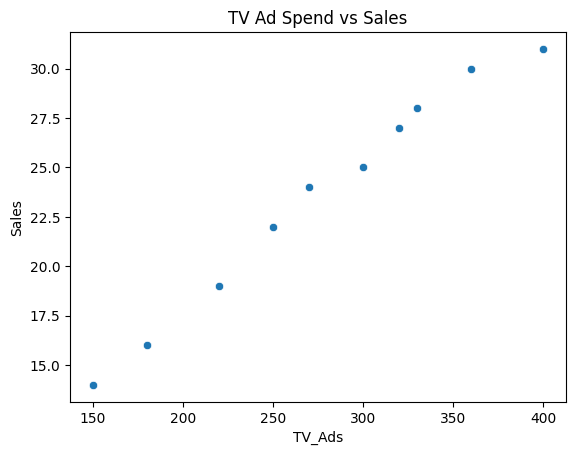

📌 Pearson Correlation Test Results
Correlation Coefficient (r): 0.9925
P-Value: 0.0000
✅ Significant linear relationship (Reject H0)


In [ ]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# 🧾 Sample data: Advertising budget vs Sales
data = {
    'TV_Ads': [250, 300, 320, 400, 150, 180, 270, 220, 330, 360],
    'Sales': [22, 25, 27, 31, 14, 16, 24, 19, 28, 30]
}
df = pd.DataFrame(data)

# 📊 Scatter plot to visualize relationship
sns.scatterplot(x='TV_Ads', y='Sales', data=df)
plt.title('TV Ad Spend vs Sales')
plt.show()

# 🧪 Pearson Correlation Test
corr_coef, p_value = pearsonr(df['TV_Ads'], df['Sales'])

# 📌 Output results
print("📌 Pearson Correlation Test Results")
print(f"Correlation Coefficient (r): {corr_coef:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Significant linear relationship (Reject H0)")
else:
    print("❌ No significant linear relationship (Fail to reject H0)")
